# Predicting basketball game winners

This will be using data from [this](https://www.kaggle.com/competitions/mens-machine-learning-competition-2019/overview) Kaggle competition. There is also the [equivalent](https://www.kaggle.com/competitions/womens-machine-learning-competition-2019/overview) for women. You can use either, you'll just have to switch some filename in the following code.

In [ ]:
!git lfs pull --include ../../data/mens-machine-learning-competition-2019.zip


In [8]:
import pathlib
import zipfile
import pandas as pd

# Allow pandas to display more columns
pd.options.display.max_columns = 999

data_dir = pathlib.Path('../../data/mens-machine-learning-competition-2019.zip')

with zipfile.ZipFile(data_dir, 'r') as z:
    with z.open('DataFiles/RegularSeasonDetailedResults.csv', 'r') as file_in_zip:
        regular_results = pd.read_csv(file_in_zip)
    with z.open('DataFiles/NCAATourneyDetailedResults.csv', 'r') as file_in_zip:
        tourney_results = pd.read_csv(file_in_zip)


In [10]:
regular_results.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [11]:
tourney_results.head()


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,11,29,17,26,14,30,17,12,5,3,22,29,67,12,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,7,23,11,14,11,36,22,16,10,7,8,20,64,4,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,6,14,16,22,10,27,18,9,7,4,19,25,69,7,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,3,7,18,25,11,20,15,18,13,1,19,27,60,7,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,7,20,15,23,18,20,17,13,8,2,14,25,56,9,21,15,20,10,26,16,14,5,8,19


**🤔 Question: after playing around with the data a little, are there any first observations you can make?**

We have one dataset for games ocurring in the regular season. We also have one for tournament games, which happen between teams who qualified for the tournament during the regular season. Let's take a look at one these files.

In [2]:
regular_results.sample(5)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
5477,2004,40,1235,76,1251,58,H,0,29,68,2,7,16,22,18,25,14,12,12,9,13,22,68,8,25,6,8,21,25,11,23,6,8,19
75007,2017,96,1225,81,1170,67,H,0,29,54,5,12,18,26,7,24,17,10,7,4,19,26,57,5,14,10,16,8,21,10,11,5,1,20
266,2003,22,1233,98,1126,79,H,0,34,60,10,20,20,28,13,23,24,17,9,7,23,29,63,6,12,15,21,14,19,8,17,6,1,22
75000,2017,96,1206,95,1247,75,H,0,31,49,10,18,23,27,6,29,15,14,2,1,21,25,55,11,25,14,20,6,15,12,9,7,2,21
26726,2008,82,1345,60,1458,56,H,0,21,56,7,20,11,14,12,23,15,12,6,6,22,20,52,4,12,12,19,11,21,11,13,6,4,17


The first 7 columns summarize the match: who won, how many points each team scored, etc. The other columns are statistical facts about the game -- more information [here](https://www.kaggle.com/competitions/mens-machine-learning-competition-2019/data).

The goal of this tutorial is to build a machine learning classifier which determines which team should win a game.

**🤔 Question: why can't we use most of the columns in this dataset as features?**

## Warming up

When I did this competition, I trained a model only on tournament matches. I didn't do that well. This time, we'll train a model on all the matches.

First, let's join the two tables together.

In [3]:
results = pd.concat([
    regular_results.assign(is_tourney=False),
    tourney_results.assign(is_tourney=True)
])
results.sample(5)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,is_tourney
19073,2007,20,1261,88,1419,57,H,0,36,60,7,18,9,12,7,35,26,14,8,5,11,21,64,10,31,5,8,9,19,10,12,6,1,11,False
6361,2004,65,1330,74,1206,71,A,0,28,59,4,19,14,17,13,26,14,16,5,2,19,28,62,4,22,11,17,11,20,16,9,6,2,19,False
49284,2012,117,1299,79,1354,75,A,0,28,55,10,14,13,25,10,28,16,12,2,1,22,27,62,8,27,13,21,12,25,12,8,3,5,19,False
31782,2009,80,1434,63,1454,51,H,0,23,59,5,13,12,14,11,27,12,11,11,1,15,15,51,11,34,10,13,11,26,10,20,5,6,17,False
67933,2016,61,1129,84,1161,80,H,0,30,64,9,29,15,25,8,21,16,8,10,2,15,27,53,11,27,15,20,7,30,9,16,4,1,20,False


Now we have a single table with all the matches.

Each team is assigned an ID. Let's make that more human-friendly by replacing each ID with the corresponding name.

In [12]:
with zipfile.ZipFile(data_dir, 'r') as z:
    with z.open('DataFiles/Teams.csv', 'r') as file_in_zip:
        teams = pd.read_csv(file_in_zip, index_col='TeamID')
teams.sample(5)


,TeamName,FirstD1Season,LastD1Season
TeamID,,,
1109,Alliant Intl,1985,1991
1409,Tulsa,1985,2019
1156,Cleveland St,1985,2019
1272,Memphis,1985,2019
1322,Northwestern LA,1985,2019


In [5]:
results['WTeam'] = results['WTeamID'].map(teams['TeamName'])
results['LTeam'] = results['LTeamID'].map(teams['TeamName'])
results.sample(5)


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,is_tourney,WTeam,LTeam
20383,2007,54,1431,92,1405,71,H,0,32,66,10,28,18,33,13,24,23,17,11,2,17,26,59,8,26,11,15,10,31,16,27,5,4,28,False,UTEP,Toledo
59805,2014,115,1266,75,1207,73,H,0,23,52,6,11,23,34,10,22,20,7,5,4,25,20,51,6,20,27,30,9,24,14,10,4,4,26,False,Marquette,Georgetown
2676,2003,85,1448,81,1155,60,A,0,25,50,9,19,22,31,13,25,19,10,7,4,18,23,58,10,23,4,12,16,16,15,14,4,4,26,False,Wake Forest,Clemson
24630,2008,26,1222,83,1292,68,H,0,24,47,16,30,19,29,6,22,20,13,9,4,17,24,50,7,19,13,20,8,23,14,16,4,1,22,False,Houston,MTSU
28027,2008,110,1409,77,1342,58,H,0,30,55,11,26,6,7,9,30,13,18,6,4,11,21,54,10,27,6,10,6,17,13,13,9,0,13,False,Tulsa,Presbyterian


Let's spend a little bit of time looking at these new columns.

In [6]:
results['LTeam'].dtype


dtype('O')

In [7]:
memory_usage_in_bytes = results['LTeam'].memory_usage(deep=True)
print(f"{memory_usage_in_bytes:,d}B")


6,172,447B


The `'0'` type means pandas is storing those values as is, without any optimization. However, pandas also has support for what they call [categorical data](https://pandas.pydata.org/docs/user_guide/categorical.html). This will use dictionary encoding and will use much less memory.

In [8]:
results['LTeam'] = results['LTeam'].astype('category')
results['WTeam'] = results['WTeam'].astype('category')
memory_usage_in_bytes = results['LTeam'].memory_usage(deep=True)
print(f"{memory_usage_in_bytes:,d}B")


862,705B


In [9]:
results['LTeam'].cat.categories


Index(['Abilene Chr', 'Air Force', 'Akron', 'Alabama', 'Alabama A&M',
       'Alabama St', 'Albany NY', 'Alcorn St', 'American Univ',
       'Appalachian St',
       ...
       'Wichita St', 'William & Mary', 'Winthrop', 'Wisconsin', 'Wofford',
       'Wright St', 'Wyoming', 'Xavier', 'Yale', 'Youngstown St'],
      dtype='object', length=355)

**🤔 Question: what other optimizations can you think of?**

## Defining the training set

We have a record of wins and losses. Intuitively, the model we want to build should be a binary classifier. We need to reshape the table a little to turn it into a binary classification problem.

In [10]:
wins = pd.DataFrame({
    'season': results['Season'],
    'day': results['DayNum'],
    'is_tourney': results['is_tourney'],
    'team': results['WTeam'],
    'opponent': results['LTeam'],
    'win': True,
    'score': results['WScore'],
    'opponent_score': results['LScore'],
    'location': results['WLoc']
})

losses = pd.DataFrame({
    'season': results['Season'],
    'day': results['DayNum'],
    'is_tourney': results['is_tourney'],
    'team': results['LTeam'],
    'opponent': results['WTeam'],
    'win': False,
    'score': results['LScore'],
    'opponent_score': results['WScore'],
    'location': results['WLoc'].map({'H': 'A', 'A': 'H', 'N': 'N'})
})

games = pd.concat([wins, losses])
games = games.sort_values(['season', 'day'])
games = games.reset_index(drop=True)
games.sample(5)


,season,day,is_tourney,team,opponent,win,score,opponent_score,location
129181,2015,86,False,East Carolina,Memphis,False,58,70,A
161147,2018,79,False,Colgate,Lehigh,True,76,72,A
95082,2012,68,False,Oakland,IUPUI,True,93,81,H
152641,2017,103,False,Vanderbilt,Missouri,False,52,72,A
127276,2015,66,False,Portland,Santa Clara,True,78,61,H


It's always good to run sanity checks to cover your bases.

In [11]:
assert len(games) == len(results) * 2


**🤔 Question: how could we have framed this task differently?**

**🤔 Question: what would be another way to handle the "symmetry" issue?**

## Extracting a first set of features

Intuitively, a team's ability to win should be correlated with its winning rate over past games. Let's build a feature to capture this.

**🤔 Question: why can't we just do `games.groupby('team')['win'].mean()` and call it a day?**

In [12]:
cumulative = {'window': len(games), 'min_periods': 0}
past_win_rates = (
    games
    .groupby(['season', 'team'])
    ['win']
    .rolling(**cumulative)
    .mean()
)
past_win_rates.head()


season  team           
2003    Air Force  299     0.000000
                   492     0.500000
                   678     0.666667
                   955     0.500000
                   1224    0.600000
Name: win, dtype: float64

**🤔 Question: previously we ran `games.sort_values(['season', 'day'])`, why was that important?**

**🤔 Question: other than `season` and `team`, what does the third index correspond to?**

It's easy to write features that aren't actually correct. Essentially, a feature is translating a human intuition into numbers. Getting that right is tricky. The best is always is to inspect features manually. The Japanese call this *shisa kanko*: [pointing and calling](https://www.wikiwand.com/en/Pointing_and_calling).

In [13]:
games.query('season == 2003 and team == "Air Force"').head()


,season,day,is_tourney,team,opponent,win,score,opponent_score,location
299,2003,19,False,Air Force,Louisville,False,47,65,A
492,2003,22,False,Air Force,Stetson,True,72,43,H
678,2003,25,False,Air Force,Arkansas St,True,57,52,A
955,2003,27,False,Air Force,Tennessee Tech,False,47,60,A
1224,2003,31,False,Air Force,UTRGV,True,65,44,H


**🤔 Question: what is the issue with our feature? (hint below)**

Let's recompute the feature by shifting up the `win` column.

In [14]:
past_win_rates = (
    games
    .groupby(['season', 'team'])
    .apply(lambda x: (
        x['win']
        .shift(1)
        .rolling(**cumulative).mean()
    ))
)
past_win_rates.head()


season  team           
2003    Air Force  299          NaN
                   492     0.000000
                   678     0.500000
                   955     0.666667
                   1224    0.500000
Name: win, dtype: float64

That looks better. The only issue is that performance-wise, we're using pandas' `apply` method. There are loads of articles online about why `apply` leads to slower computation. Basically, it's really flexible because you can apply any function to a group. But it's not making use of vectorization.

In [15]:
past_win_rates = (
    games
    .assign(prev_win=games.groupby(['season', 'team'])['win'].shift(1))
    .groupby(['season', 'team'])
    ['prev_win']
    .rolling(**cumulative)
    .mean()
)
past_win_rates.head()


season  team           
2003    Air Force  299          NaN
                   492     0.000000
                   678     0.500000
                   955     0.666667
                   1224    0.500000
Name: prev_win, dtype: float64

This second approach is faster, even though it uses two `groupby` statements. Add a `%%timeit` at the top each cell and re-run them to compare.

This really shows that understanding the tool you're using goes a long way. Of course, it's the tool's job to make you fall in the [pit of success](https://blog.codinghorror.com/falling-into-the-pit-of-success/). But tools aren't always well designed, even commonly used ones.

I don't know a faster way to do this with pandas. This groupby/shift/rolling "dance" is not very common and is maybe specific to machine learning, but it's really useful. Indeed, a lot of datasets have a temporal aspect to them, so rolling computations on shifted data is immensely useful. You should learn how to do it in your language/tool of choice, and reuse that bit of code like a recipe.

In [16]:
past_win_rates.droplevel(['season', 'team']).head()


299          NaN
492     0.000000
678     0.500000
955     0.666667
1224    0.500000
Name: prev_win, dtype: float64

In [17]:
games['past_win_rate'] = past_win_rates.droplevel(['season', 'team'])
games.query('season == 2003 and team == "Air Force"').head()


,season,day,is_tourney,team,opponent,win,score,opponent_score,location,past_win_rate
299,2003,19,False,Air Force,Louisville,False,47,65,A,NaN
492,2003,22,False,Air Force,Stetson,True,72,43,H,0.000000
678,2003,25,False,Air Force,Arkansas St,True,57,52,A,0.500000
955,2003,27,False,Air Force,Tennessee Tech,False,47,60,A,0.666667
1224,2003,31,False,Air Force,UTRGV,True,65,44,H,0.500000


Looks good! We'll compute a second feature in the same way to summarize the steps to take. Let's calculate the average score difference which occurred in the past games.

In [18]:
games['past_avg_score_diff'] = (
    games
    .assign(score_diff=games.eval('score - opponent_score'))
    .assign(prev_score_diff=lambda x: x.groupby(['season', 'team'])['score_diff'].shift(1))
    .groupby(['season', 'team'])
    ['prev_score_diff']
    .rolling(**cumulative)
    .mean()
    .droplevel(['season', 'team'])
)
games.query('season == 2003 and team == "Air Force"').head()


,season,day,is_tourney,team,opponent,win,score,opponent_score,location,past_win_rate,past_avg_score_diff
299,2003,19,False,Air Force,Louisville,False,47,65,A,NaN,NaN
492,2003,22,False,Air Force,Stetson,True,72,43,H,0.000000,-18.000000
678,2003,25,False,Air Force,Arkansas St,True,57,52,A,0.500000,5.500000
955,2003,27,False,Air Force,Tennessee Tech,False,47,60,A,0.666667,5.333333
1224,2003,31,False,Air Force,UTRGV,True,65,44,H,0.500000,0.750000


In [19]:
last_5 = {'window': 5, 'min_periods': 0}
games['win_rate_last_5_games'] = (
    games
    .assign(prev_win=games.groupby(['season', 'team'])['win'].shift(1))
    .groupby(['season', 'team'])
    ['prev_win']
    .rolling(**last_5)
    .mean()
    .droplevel(['season', 'team'])
)
games.query('season == 2003 and team == "Air Force"').head(8)


,season,day,is_tourney,team,opponent,win,score,opponent_score,location,past_win_rate,past_avg_score_diff,win_rate_last_5_games
299,2003,19,False,Air Force,Louisville,False,47,65,A,NaN,NaN,NaN
492,2003,22,False,Air Force,Stetson,True,72,43,H,0.000000,-18.000000,0.000000
678,2003,25,False,Air Force,Arkansas St,True,57,52,A,0.500000,5.500000,0.500000
955,2003,27,False,Air Force,Tennessee Tech,False,47,60,A,0.666667,5.333333,0.666667
1224,2003,31,False,Air Force,UTRGV,True,65,44,H,0.500000,0.750000,0.500000
1526,2003,34,False,Air Force,Ga Southern,True,70,56,A,0.600000,4.800000,0.600000
1632,2003,37,False,Air Force,Belmont,True,85,76,H,0.666667,6.333333,0.800000
2422,2003,48,False,Air Force,Oakland,False,44,61,A,0.714286,6.714286,0.800000


**🤔 Question: the code is quite repetitive. How could we avoid redundancy?**

**🤔 Question: can you identify one of the potential issues of the features we built?**

**🤔 Question: we calculated features for one team, but what about the opposing team?**

## Checkpointing

It's always a good idea to take checkpoints from time to time. In terms of code, the obvious thing to do is to version your code with `git` and push it to GitHub. This is particularly useful for machine learning, where reproducibility matters a lot. If you have some good results, then checkpointing will ensure you can time-travel back to that point in time where things worked well.

In terms of data, `git` is not meant to version large files. However, you can save your table(s) locally from time to time. That way, you can turn your computer off, go to sleep, and come back to your work in the morning. This can sound obvious, but it makes sense for machine learning in particular when you work with big files which took a long time to build.

With `pandas`, a common reflex is to use the `.to_csv` method. However, the CSV is not meant for large amounts of data. Thankfully, `pandas` supports other formats. My preferred solution is `to_pickle` (and `read_pickle`). It's really fast, and will save/load your table without any modifications. Other methods, such as `to_feather` and `to_hdf` might change some data types without warning you. They also require extra dependencies.

In [20]:
%timeit games.to_pickle('games.pkl')
%timeit pd.read_pickle('games.pkl')


4.65 ms ± 155 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
4.22 ms ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [21]:
%timeit games.to_csv('games.csv')
%timeit pd.read_csv('games.csv')


470 ms ± 12.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
99.6 ms ± 2.72 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Way faster, right? The `to_pickle` and `read_pickle` methods are based on Python's [`pickle` module](https://docs.python.org/3/library/pickle.html). You can save any kind of Python object with it.

We can make sure this process of saving and loading didn't change anything to our data.

In [22]:
assert pd.read_pickle('games.pkl').equals(games)


For most serious projects, it makes sense to not use a single notebook/script. Instead, a usually good idea is to have many scripts which do several small tasks. For example, there could be one script for extracting features, and another one for training a model. By saving outputs at the end of each script, you don't have to re-run all the scripts each time you want to try out something new. Of course, you can do this with a single notebook, it's just a question of taste, and also depends on how you work with others.

## Training a first model

There are many more features we could add before training a model. However, it's a good idea to start simple, and get the whole thing working from start to finish. That way, we can add features progressively, and measure its impact by retraining the model. This also gamifies the process a little and makes somewhat fun. It's better than running blind and aimlessly building features just for the sake of it.

Before actually training a classifier, let's divide our data into buckets. The typical way to do this is to have three parts:

- A training set (called the "fit" set) which the classifier will actually be trained on.
- A validation set for hyper-parameter tuning.
- A test set for establishing the model's performance. This subset should never be seen by the model whatsoever, even for validation.

In [23]:
is_fit = games.eval('not is_tourney')
is_val = games.eval('season < 2018 and is_tourney')
is_test = games.eval('season == 2018 and is_tourney')


Let's check all the rows are actually being used.

In [24]:
assert (is_fit | is_val | is_test).all()


**🤔 Question: why does this split make more sense than, say, randomly splitting the data?**

Now let's actually split our dataset using these so-called "masks".

In [25]:
not_features = ['season', 'day', 'is_tourney', 'team', 'opponent', 'win', 'score', 'opponent_score']

features = games.columns.drop(not_features)
games['location'] = games['location'].astype('category')
target = games.win

X_fit = games.loc[is_fit, features]
y_fit = games.loc[is_fit]['win']

X_val = games.loc[is_val, features]
y_val = games.loc[is_val]['win']

X_test = games.loc[is_test, features]
y_test = games.loc[is_test]['win']


One thing to note is that `.loc` doesn't create a copy of the selected data. Each variable references a certain part of the `games` table, which is memory-efficient.

Let's use LightGBM, which is the best library to use by default. We could have used [scikit-learn's `HistGradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.HistGradientBoostingClassifier.html), which is a reimplementation of [LightGBM](https://lightgbm.readthedocs.io/en/v3.3.2/), but it doesn't yet have as many features. For instance, you can't specify a specific validation set; you can only specify what random fraction of the training data to use.

In [26]:
import warnings
import lightgbm

model = lightgbm.LGBMClassifier(
    n_estimators=100,
    max_depth=5,
    learning_rate=0.02,
    min_child_samples=20,
    random_state=42,
    n_jobs=4
)

with warnings.catch_warnings(category=UserWarning):
    warnings.simplefilter('ignore')
    model = model.fit(
        X=X_fit,
        y=y_fit,
        eval_set=[
            (X_fit, y_fit),
            (X_val, y_val)
        ],
        eval_names=['fit', 'val'],
        eval_metric='acc',
        early_stopping_rounds=10,
        verbose=10
    )


[10]	fit's binary_logloss: 0.666948	val's binary_logloss: 0.688828
[20]	fit's binary_logloss: 0.649005	val's binary_logloss: 0.686128
[30]	fit's binary_logloss: 0.636495	val's binary_logloss: 0.68439
[40]	fit's binary_logloss: 0.627575	val's binary_logloss: 0.683372
[50]	fit's binary_logloss: 0.621243	val's binary_logloss: 0.682682
[60]	fit's binary_logloss: 0.616735	val's binary_logloss: 0.682555


In [27]:
print(
    pd.Series(model.feature_importances_, index=X_fit.columns)
    .rename('Feature importance')
    .sort_values(ascending=False)
    .to_frame()
    .to_string()
)


                       Feature importance
past_avg_score_diff                   750
win_rate_last_5_games                 438
past_win_rate                         327
location                              225


In [28]:
from sklearn import metrics

y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.2%}')


Test accuracy: 52.99%


Better than flipping a coin! But not great.

**🤔 Question: can you find LightGBM parameters which produce a better performance? If so, how did you proceed?**

**🤔 Question: we've used 2018 as a test set, but the goal is to make predictions for 2019 tournament games. How would we go about doing that?**

## Relative skill measures

The `past_avg_score_diff` performs better than `past_win_rate` because it provides more detail. Instead of just indicating whether a team won or not, it tells how convincing those victories were. A team that wins 80% of the time with very slim margins should be less likely to win than one which wins with big score differences.

Wins against "strong" teams should count more than wins against "weak" teams. One way to represent this is with the [ELO rating system](https://www.wikiwand.com/en/Elo_rating_system), many variants of which have been proposed. In particular, Microsoft patented a method called [TrueSkill](https://www.microsoft.com/en-us/research/project/trueskill-ranking-system). Although their algorithm is patented, they published a [research paper](https://papers.nips.cc/paper/2006/file/f44ee263952e65b3610b8ba51229d1f9-Paper.pdf). Unsurprisingly, somebody wrote a Python [package](https://trueskill.org/) which implements the algorithm. That's the beauty of open-source.

```sh
pip install trueskill
```

Just like we've been doing for win rates and point differences, let's attempt to calculate the ELO rating of each team in a rolling manner.

**🤔 Question: why can't we just calculate the ELO score over the whole dataset? In other words, why does it have to be a rolling computation? We've already sort of answered this before in previous questions.**

In [29]:
import trueskill as ts

ts.Rating()


trueskill.Rating(mu=25.000, sigma=8.333)

In [30]:
ts.Rating().mu


25.0

In [31]:
team_ratings = {}
opponent_ratings = {}

for season, season_games in games.groupby('season'):
    print(f'{season}: {len(season_games):,d} games')
    ratings = {team: ts.Rating() for team in season_games.team.unique()}

    for _, game in season_games.iterrows():

        # Store the ratings at this point in time
        team_ratings[(season, game.day, game.team)] = ratings[game.team].mu
        opponent_ratings[(season, game.day, game.opponent)] = ratings[game.opponent].mu

        # Update the ratings
        winner, loser = (game.team, game.opponent) if game.win else (game.opponent, game.team)
        ratings[winner], ratings[loser] = ts.rate_1vs1(ratings[winner], ratings[loser])


2003: 9,360 games
2004: 9,270 games
2005: 9,478 games
2006: 9,642 games
2007: 10,214 games
2008: 10,454 games
2009: 10,626 games
2010: 10,654 games
2011: 10,626 games
2012: 10,640 games
2013: 10,774 games
2014: 10,858 games
2015: 10,842 games
2016: 10,872 games
2017: 10,924 games
2018: 10,944 games


In [32]:
games = (
    games
    .drop(columns=['team_true_skill', 'opponent_true_skill'], errors='ignore')
    .join(
        pd.Series(team_ratings, name='team_true_skill'),
        on=['season', 'day', 'team'],
    ).join(
        pd.Series(opponent_ratings, name='opponent_true_skill'),
        on=['season', 'day', 'opponent'],
    )
)
games.sample(5)


,season,day,is_tourney,team,opponent,win,score,opponent_score,location,past_win_rate,past_avg_score_diff,win_rate_last_5_games,team_true_skill,opponent_true_skill
113760,2014,26,False,C Michigan,Jacksonville St,True,66,61,H,0.500000,0.166667,0.6,21.228135,14.152197
46324,2007,113,False,Providence,West Virginia,True,64,61,H,0.640000,6.680000,0.4,32.094433,36.813988
46797,2007,117,False,Buffalo,Miami OH,False,68,80,A,0.407407,-3.703704,0.2,20.930145,28.135149
37106,2006,124,False,Northeastern,Old Dominion,True,71,63,N,0.629630,4.000000,1.0,28.653465,31.464115
161243,2018,80,False,E Washington,Northern Arizona,True,81,76,A,0.375000,-1.562500,0.6,22.484336,12.815492


**🤔 Question: why did we drop columns and why does it matter?**

We now have a new shiny feature. The next thing we should do is see if it brings any lift to our model's performance. Instead of copy/pasting the code we used above for training and evaluating the model, let's create some reusable functions.

In [33]:
def split_data(games):
    not_features = ['season', 'day', 'is_tourney', 'team', 'opponent', 'win', 'score', 'opponent_score']

    features = games.columns.drop(not_features)
    games['location'] = games['location'].astype('category')
    target = games.win

    X_fit = games.loc[is_fit, features]
    y_fit = games.loc[is_fit]['win']

    X_val = games.loc[is_val, features]
    y_val = games.loc[is_val]['win']

    X_test = games.loc[is_test, features]
    y_test = games.loc[is_test]['win']

    return X_fit, y_fit, X_val, y_val, X_test, y_test

def train_model(X_fit, y_fit, X_val, y_val, **model_params):

    model = lightgbm.LGBMClassifier(
        n_estimators=100,
        max_depth=5,
        learning_rate=0.02,
        min_child_samples=20,
        random_state=42,
        n_jobs=4,
        **model_params
    )
    model.feature_names_in_ = X_fit.columns.tolist()

    with warnings.catch_warnings(category=UserWarning):
        warnings.simplefilter('ignore')
        model = model.fit(
            X=X_fit,
            y=y_fit,
            eval_set=[
                (X_fit, y_fit),
                (X_val, y_val)
            ],
            eval_names=['fit', 'val'],
            eval_metric='acc',
            early_stopping_rounds=10,
            verbose=10
        )

    return model


In [34]:
X_fit, y_fit, X_val, y_val, X_test, y_test = split_data(games)
model = train_model(X_fit, y_fit, X_val, y_val)
y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.2%}')


[10]	fit's binary_logloss: 0.640835	val's binary_logloss: 0.663782
[20]	fit's binary_logloss: 0.603408	val's binary_logloss: 0.638755
[30]	fit's binary_logloss: 0.576112	val's binary_logloss: 0.623267
[40]	fit's binary_logloss: 0.555569	val's binary_logloss: 0.610479
[50]	fit's binary_logloss: 0.539954	val's binary_logloss: 0.600931
[60]	fit's binary_logloss: 0.527843	val's binary_logloss: 0.592623
[70]	fit's binary_logloss: 0.518403	val's binary_logloss: 0.584666
[80]	fit's binary_logloss: 0.510867	val's binary_logloss: 0.576673
[90]	fit's binary_logloss: 0.504794	val's binary_logloss: 0.57089
[100]	fit's binary_logloss: 0.499839	val's binary_logloss: 0.566603
Test accuracy: 70.90%


Hurray, there's a lift! 🚀

In [35]:
def rank_features(model):
    return (
        pd.Series(model.feature_importances_, index=model.feature_names_in_)
        .rename('Feature importance')
        .sort_values(ascending=False)
        .to_frame()
        .to_string()
    )

print(rank_features(model))


                       Feature importance
team_true_skill                      1192
opponent_true_skill                  1187
past_avg_score_diff                   304
past_win_rate                         199
location                              102
win_rate_last_5_games                  16


**🤔 Question: does using `team_true_skill - opponent_true_skill` as a feature help? Why do you think that is?**

## Including play-by-play data

In [36]:
year = 2016
events = pd.read_csv(f'{data_dir}/PlayByPlay_{year}/Events_{year}.csv')
events.head()


,EventID,Season,DayNum,WTeamID,LTeamID,WPoints,LPoints,ElapsedSeconds,EventTeamID,EventPlayerID,EventType
0,15252382,2016,11,1104,1244,0,0,13,1104,631933,miss2_lay
1,15252383,2016,11,1104,1244,0,0,13,1104,631933,reb_off
2,15252384,2016,11,1104,1244,0,0,16,1244,634018,foul_pers
3,15252385,2016,11,1104,1244,0,0,16,1104,631933,miss1_free
4,15252386,2016,11,1104,1244,0,0,16,1104,631934,reb_dead


In [37]:
f"{len(events):,d} events in {year}"


'2,638,279 events in 2016'

Now we're kinda getting into the world of Big Data™. Let's see how many events there are in total. A nice way to do this is from the command-line, which can be accessed from a Jupyter Notebook by prefixing a command with `!`

In [38]:
!wc -l {data_dir}/*/Events_*.csv


 2502631 mens-machine-learning-competition-2019/PlayByPlay_2010/Events_2010.csv
 2520408 mens-machine-learning-competition-2019/PlayByPlay_2011/Events_2011.csv
 2506274 mens-machine-learning-competition-2019/PlayByPlay_2012/Events_2012.csv
 2561232 mens-machine-learning-competition-2019/PlayByPlay_2013/Events_2013.csv
 2613208 mens-machine-learning-competition-2019/PlayByPlay_2014/Events_2014.csv
 2548634 mens-machine-learning-competition-2019/PlayByPlay_2015/Events_2015.csv
 2638280 mens-machine-learning-competition-2019/PlayByPlay_2016/Events_2016.csv
 2543980 mens-machine-learning-competition-2019/PlayByPlay_2017/Events_2017.csv
 2556537 mens-machine-learning-competition-2019/PlayByPlay_2018/Events_2018.csv
 2543317 mens-machine-learning-competition-2019/PlayByPlay_2019/Events_2019.csv
 25534501 total


That's a lot, but it would probably still fit in memory. Still, that's not always the case. Sometimes it's handy to have a tool which can perform incremental computations. Distributed tools can do this by progressively loading the data and computing the result incrementally. [Spark](https://spark.apache.org/) is a common tool for doing this. However, we'll use [Dask](https://www.dask.org/), which has a very similar syntax to pandas and is easier to install.

In [39]:
import dask.dataframe as dd

events = dd.read_csv(f'{data_dir}/*/Events_*.csv')
events.npartitions


20

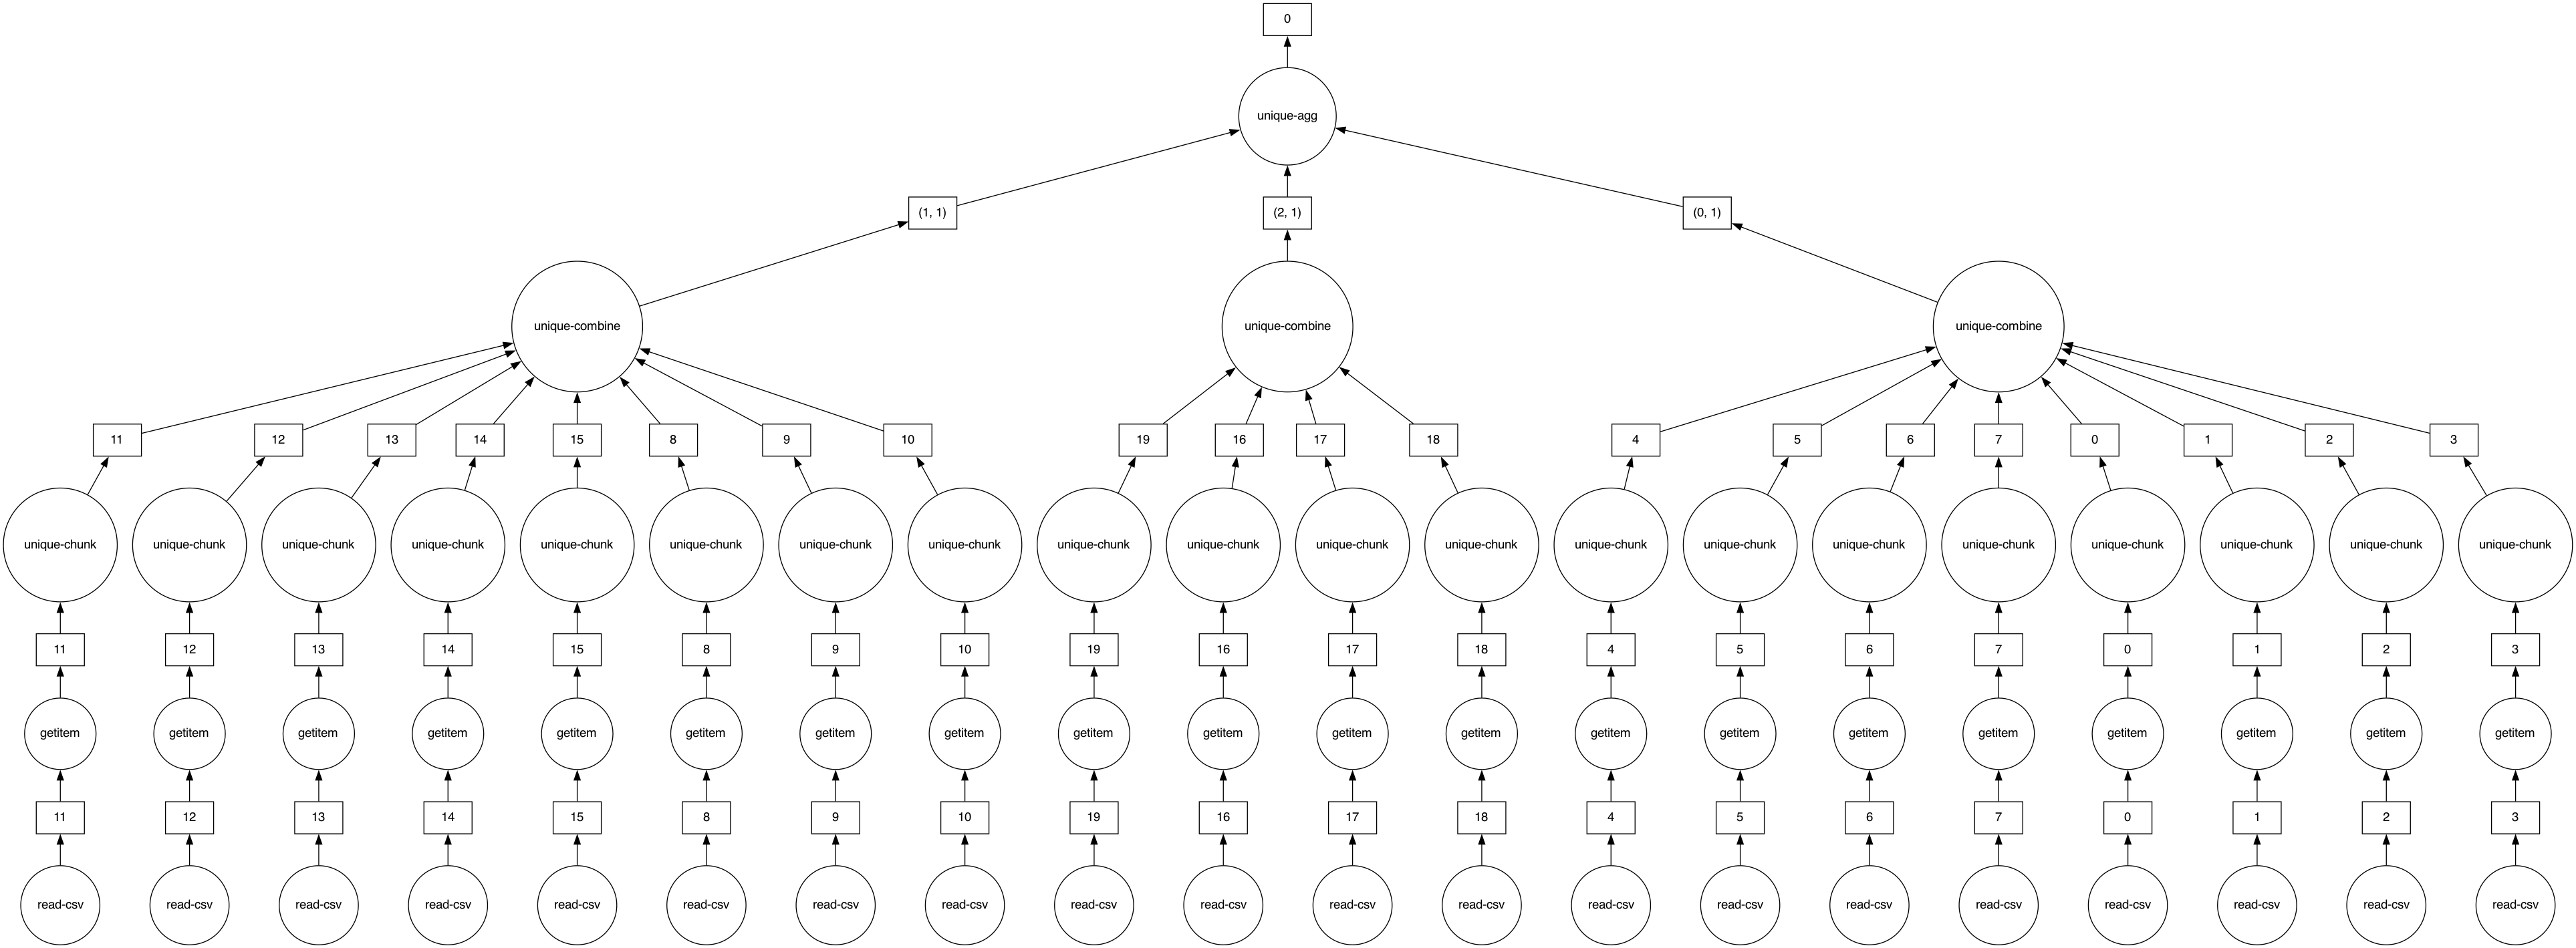

In [40]:
events['Season'].unique().visualize()


In [41]:
events['Season'].unique().compute()


0    2010
1    2011
2    2012
3    2013
4    2014
5    2015
6    2016
7    2017
8    2018
9    2019
Name: Season, dtype: int64

That was a bit slow, right? That's because Dask is loading the data from the disk on the fly. If we do the same operation with pandas, the result is obtained near-instantly because the data is already in memory. Moreover, Dask has to spend time merging the result obtained through each partition. Indeed, distributed computation comes at a cost: communication.

Let's calculate the number of defensive and offensive rebounds each team makes. Teams that make a lot of offensive rebounds should have an advantage over teams that don't make a lot of defensive rebounds.

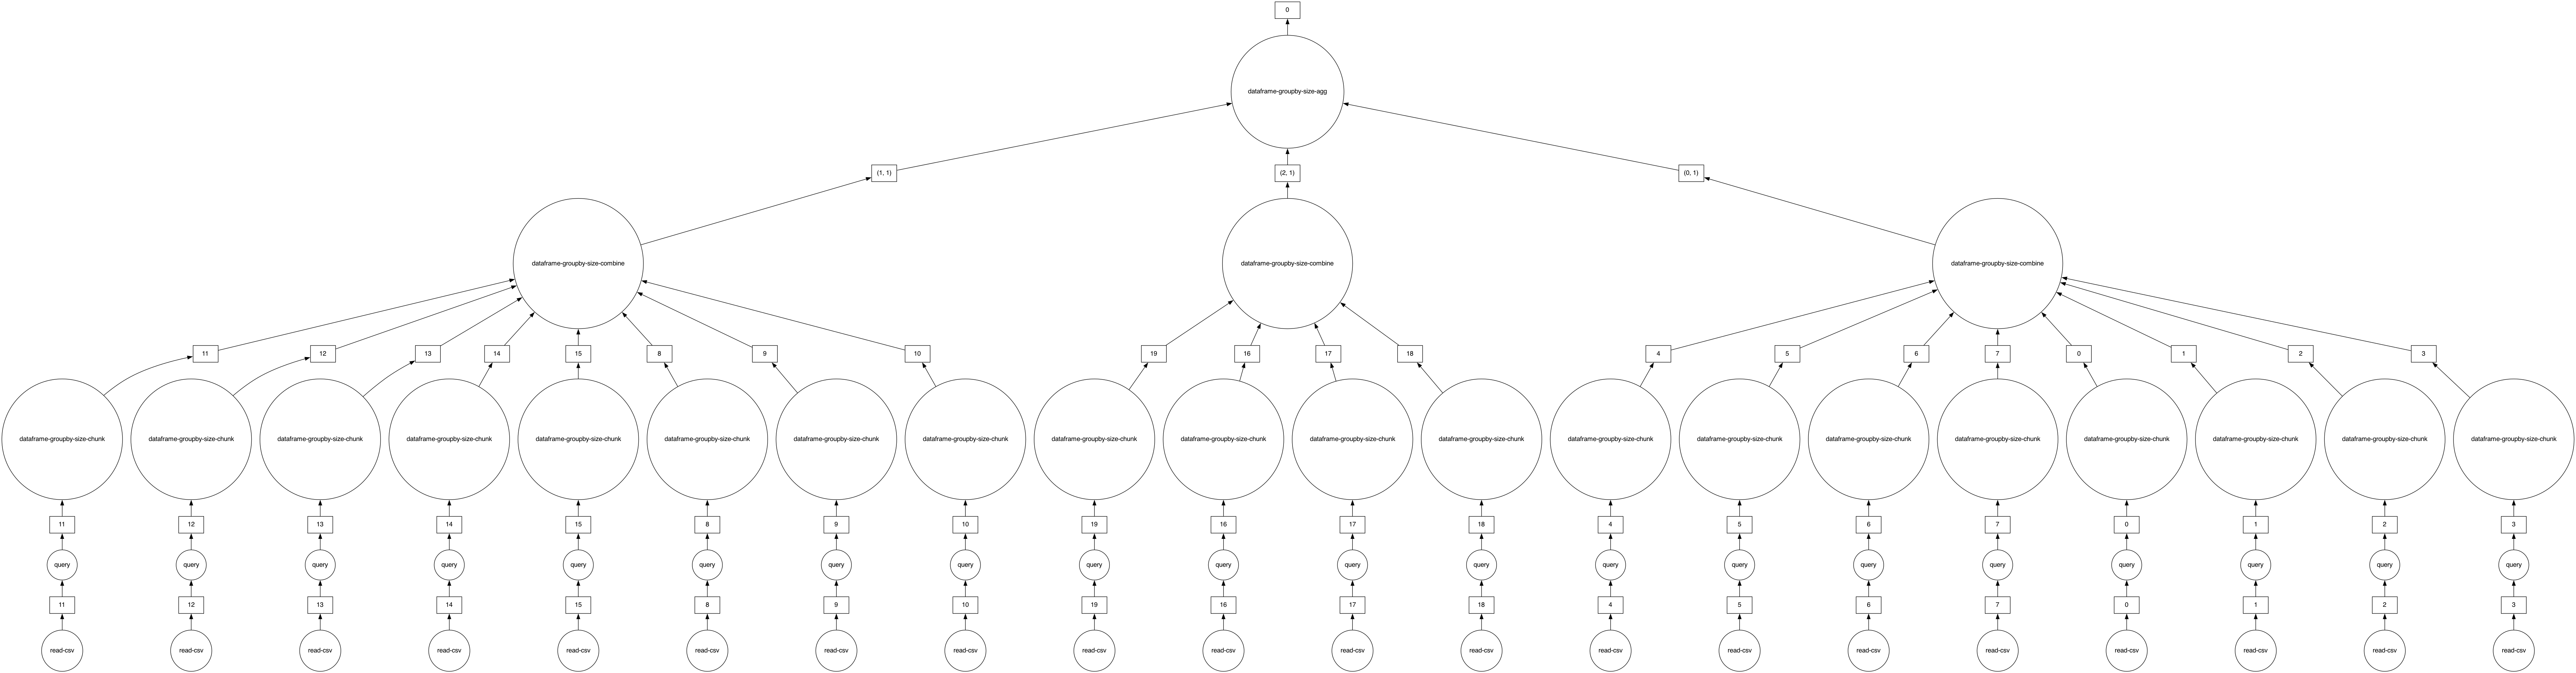

In [42]:
event_counts = (
    events
    .query('EventType == "reb_def" or EventType == "reb_off"')
    .groupby(['Season', 'DayNum', 'EventTeamID', 'EventType'])
    .size()
)
event_counts.visualize()


That looks a bit crazy, right? This is the power of Dask (and Spark and Ray for that matter). These tools allow you build complex operations spanning multiple partitions across several compute nodes, while using a familiar syntax. Indeed, the code we just used would work for a `pandas.DataFrame`.

The computation we just did is lazy. It didn't actually calculate anything. Let's run the above DAG by calling `compute`.

In [43]:
event_counts_results = event_counts.compute()
event_counts_results.head()


Season  DayNum  EventTeamID  EventType
2010    7       1107         reb_def      27
                             reb_off      12
                1108         reb_def      24
                             reb_off      11
                1143         reb_def      19
dtype: int64

Not bad. The runtime would probably be very similar if we used pandas. Indeed, most of the cost comes from reading the CSV files. It would be faster if we exported the events to a more performant file format. Moreover, the advantage of Dask is that we could run this computation on a [cluster](https://docs.dask.org/en/stable/deploying.html).

Let's make this a little nicer to work with.

In [44]:
rebounds = (
    event_counts_results.unstack('EventType')
    .reset_index()
    .assign(EventTeam=lambda x: x.EventTeamID.map(teams.TeamName))
    .drop(columns='EventTeamID')
    .rename(columns={
        'Season': 'season',
        'DayNum': 'day',
        'EventTeam': 'team',
        'reb_def': 'defensive_rebounds',
        'reb_off': 'offensive_rebounds'
    })
)
rebounds.sample(5)


EventType,season,day,defensive_rebounds,offensive_rebounds,team
46984,2014,61,27.0,15.0,Boise St
3355,2010,50,20.0,16.0,Oakland
13734,2011,48,20.0,10.0,Texas St
62736,2015,111,26.0,12.0,Hofstra
59564,2015,78,26.0,6.0,Utah St


We could have done this cleaning with Dask, but it would have been a uphill battle. Dask should be used for doing big aggregate computes. However, pandas is preferable for tidying the data. Indeed, the results produced by Dask are much smaller because they're aggregate data, therefore they can be manipulated in-memory with pandas. It's important to know when to use which tool to make the process as smooth as possible.

We have the stats per game. Let's compute features by rolling over the stats and calculating the average. Just like we did for the win rate and the score difference.

In [45]:
rebound_stats = (
    rebounds
    .assign(
        prev_defensive_rebounds=(
            rebounds
            .groupby(['season', 'team'])
            ['defensive_rebounds']
            .shift(1)
        ),
        prev_offensive_rebounds=(
            rebounds
            .groupby(['season', 'team'])
            ['offensive_rebounds']
            .shift(1)
        )
    )
    .groupby(['season', 'team'])
    [['prev_defensive_rebounds', 'prev_offensive_rebounds']]
    .rolling(**cumulative)
    .mean()
    .droplevel(['season', 'team'])
    .rename(columns={
        'prev_defensive_rebounds': 'avg_defensive_rebounds',
        'prev_offensive_rebounds': 'avg_offensive_rebounds'
    })
    .assign(
        season=rebounds['season'],
        team=rebounds['team'],
        day=rebounds['day']
    )
    .set_index(['season', 'day', 'team'])
)
rebound_stats.head()


EventType             avg_defensive_rebounds  avg_offensive_rebounds
season day team                                                     
2010   19  Air Force                     NaN                     NaN
       26  Air Force                    24.0                    7.00
       30  Air Force                    27.5                    9.50
       33  Air Force                    25.0                    9.00
       36  Air Force                    24.0                    7.75

Obviously that's a bit of a mouthful. This is an extreme example of using a declarative grammar to express processing steps. It's not everyone's cup of tea. It has the merit of being short, but it can be more difficult to debug.

**🤔 Question: take a look at the season values in the `games` and `rebound_stats` tables. What do you notice?**

Now let's add these features to our dataset.

In [46]:
games = (
    games
    .drop(columns=rebound_stats.columns, errors='ignore')
    .join(rebound_stats, on=['season', 'day', 'team'], how='left')
)
games.sample(5)


,season,day,is_tourney,team,opponent,win,score,opponent_score,location,past_win_rate,past_avg_score_diff,win_rate_last_5_games,team_true_skill,opponent_true_skill,avg_defensive_rebounds,avg_offensive_rebounds
89859,2011,127,False,Ark Little Rock,North Texas,True,64,63,N,0.500000,-1.343750,0.6,22.634675,23.586033,22.281250,10.343750
60633,2009,33,False,TN Martin,E Kentucky,False,75,78,A,0.200000,-11.000000,0.2,15.207285,25.135472,NaN,NaN
46481,2007,115,False,Lamar,TAM C. Christi,True,78,77,H,0.391304,-4.173913,0.6,19.325645,30.502835,NaN,NaN
127652,2015,68,False,Samford,Wofford,False,62,72,A,0.352941,-5.647059,0.4,17.028457,33.243696,22.647059,10.823529
163696,2018,105,False,Hampton,Coppin St,True,82,79,A,0.391304,-0.521739,0.8,16.093625,12.655511,27.260870,10.956522


Let's see the impact this will have on our model.

In [50]:
X_fit, y_fit, X_val, y_val, X_test, y_test = split_data(games)
model = train_model(X_fit, y_fit, X_val, y_val)
y_pred = model.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, y_pred)
print(f'Test accuracy: {test_accuracy:.2%}')


[10]	fit's binary_logloss: 0.640835	val's binary_logloss: 0.663782
[20]	fit's binary_logloss: 0.603408	val's binary_logloss: 0.638755
[30]	fit's binary_logloss: 0.576112	val's binary_logloss: 0.623267
[40]	fit's binary_logloss: 0.555569	val's binary_logloss: 0.610479
[50]	fit's binary_logloss: 0.539954	val's binary_logloss: 0.600931
[60]	fit's binary_logloss: 0.527843	val's binary_logloss: 0.592623
[70]	fit's binary_logloss: 0.518403	val's binary_logloss: 0.584666
[80]	fit's binary_logloss: 0.510867	val's binary_logloss: 0.576673
[90]	fit's binary_logloss: 0.504794	val's binary_logloss: 0.57089
[100]	fit's binary_logloss: 0.499839	val's binary_logloss: 0.566603
Test accuracy: 70.90%


In [51]:
print(rank_features(model))


                        Feature importance
team_true_skill                       1192
opponent_true_skill                   1187
past_avg_score_diff                    304
past_win_rate                          199
location                               102
win_rate_last_5_games                   15
avg_defensive_rebounds                   1
avg_offensive_rebounds                   0


Unlucky! These two new features don't improve the model's performance. Of course, this is assuming the implementation is correct. This kind of situation happens a lot, so get used to it 😅

## Going further

1. Can you think of another way to use the play-by-play events data?
2. How could you use this model for betting purposes?
3. Implement [rating percentage index (RPI)](https://www.wikiwand.com/en/Rating_percentage_index) and check if it improves your model.
4. Using Dask, find a file format for the events which leads to faster results.
5. Find a faster (vectorized) way to implement the rolling TrueSkill score computation. TrueSkill is probably to difficult to implement in a vectorized manner; the ELO rating system should be simpler.